<a href="https://colab.research.google.com/github/nicoyogis/TUBES-ML/blob/main/FIX_ML_model_1%2C_2_dan_3_webmail_(80_20).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json
import os  # Create directories, list files
import zipfile
import shutil
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mping
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization 
from tensorflow.keras.optimizers import Adam, RMSprop,SGD
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import time

In [ ]:
Train80 = "/content/drive/MyDrive/projek/dataset_split_80_20/train"
Val20 = "/content/drive/MyDrive/projek/dataset_split_80_20/val"
Target80 = "/content/drive/MyDrive/projek/dataset_split_80_20"
Source = "/content/drive/MyDrive/projek/dataset"

In [ ]:
#!pip install split_folders
#import splitfolders

In [ ]:
#splitfolders.ratio(input=Source, output=Target70, seed=1337, ratio=(0.7, 0.3))

# LOAD MANUAL 80-20

In [ ]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(Train80):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [ ]:
val_data = []
val_label = []
for r, d, f in os.walk(Val20):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(
    
  #  shear_range = 0.2,
  #  zoom_range=0.2,
  #  horizontal_flip=True,
     vertical_flip=True,
  #  rotation_range=20,
  #  width_shift_range=0.2,
  #  height_shift_range=0.2,
   # rescale = 1./255,
    rotation_range=20, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, horizontal_flip=True, 
    
)

val_gen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# train_generator = train_gen.flow_from_directory(
#     Train,
#     target_size=(150, 150),
#     class_mode='categorical',
#     color_mode="rgb",
#     batch_size=64
# )

# validation_generator = val_gen.flow_from_directory(
#     Val,
#     target_size=(150,150),
#     class_mode='categorical',
#     color_mode="rgb",
#     shuffle=False,
#     batch_size=64
# )

In [ ]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (1600, 150, 150, 3)
Train Label =  (1600,)
Validation Data =  (400, 150, 150, 3)
Validation Label =  (400,)


In [ ]:
x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

In [ ]:
y_train = to_categorical(y_train, 4)
y_val = to_categorical(y_val, 4)

In [ ]:
train_gen.fit(x_train)

In [ ]:
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(1600, 150, 150, 3)
(400, 150, 150, 3)
(1600, 4)
(400, 4)


## Model 1

In [ ]:
model= Sequential()

model.add(InputLayer(input_shape=[150,150,3]))

model.add(Conv2D(filters=8, kernel_size=3, strides=1,  padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=16, kernel_size=3, strides=1,  padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=32, kernel_size=3, strides=1,  padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=64, kernel_size=3, strides=1,  padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=128, kernel_size=3, strides=1,  padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=256, kernel_size=3, strides=1,  padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Flatten())

  # Fully Connected Layer
model.add(Dense(128, activation='relu')) #hidden
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  


In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy',
            optimizer=Adam(learning_rate=0.0002),
            metrics=['accuracy'])

In [ ]:
H = model.fit(train_gen.flow(x_train, y_train, batch_size=32), epochs=100, validation_data = (x_val, y_val))

Epoch 1/100
50/50 [==============================] - 9s 160ms/step - loss: 1.4116 - accuracy: 0.4281 - val_loss: 1.4124 - val_accuracy: 0.2500
Epoch 2/100
50/50 [==============================] - 8s 152ms/step - loss: 0.9078 - accuracy: 0.5994 - val_loss: 1.8196 - val_accuracy: 0.2500
Epoch 3/100
50/50 [==============================] - 8s 153ms/step - loss: 0.6974 - accuracy: 0.7138 - val_loss: 2.3477 - val_accuracy: 0.2500
Epoch 4/100
50/50 [==============================] - 8s 153ms/step - loss: 0.6098 - accuracy: 0.7381 - val_loss: 2.6452 - val_accuracy: 0.2500
Epoch 5/100
50/50 [==============================] - 8s 153ms/step - loss: 0.5171 - accuracy: 0.7956 - val_loss: 2.7080 - val_accuracy: 0.2550
Epoch 6/100
50/50 [==============================] - 8s 152ms/step - loss: 0.5022 - accuracy: 0.7894 - val_loss: 2.3248 - val_accuracy: 0.3600
Epoch 7/100
50/50 [==============================] - 8s 153ms/step - loss: 0.4735 - accuracy: 0.7956 - val_loss: 1.9837 - val_accuracy: 0.4250

In [ ]:
#model 1
y_val_hat1 = model.predict(x_val, batch_size=32)
y_val_hat1 = np.argmax(y_val_hat1, axis=1)
y_val = np.argmax(y_val, axis=1)

In [ ]:
clas_r = classification_report(y_val, y_val_hat1)
# print classification report
print('Classification report on test data')
print(clas_r)

Classification report on test data
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       100
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00       100
           3       0.99      0.81      0.89       100

    accuracy                           0.95       400
   macro avg       0.96      0.95      0.95       400
weighted avg       0.96      0.95      0.95       400



Text(0.5, 0.5, 'Predicted labels')

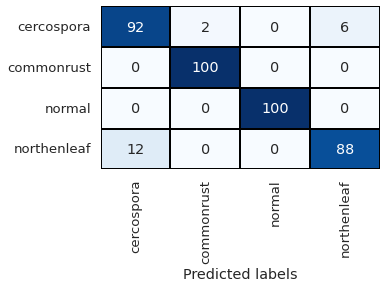

In [ ]:
# calculate confusion matrix & classification report model 1
import seaborn as sns
conf_m = confusion_matrix(y_val, y_val_hat1)

# plot confusion matrix as heatmap
plt.figure(figsize=(5,3))
sns.set(font_scale=1.2)
ax = sns.heatmap(conf_m, annot=True,xticklabels=['cercospora', 'commonrust','normal','northenleaf'], yticklabels=['cercospora', 'commonrust','normal','northenleaf'], cbar=False, cmap='Blues',linewidths=1, linecolor='black', fmt='.0f')
plt.yticks(rotation=0)
plt.xlabel('Predicted labels')

In [ ]:
from keras.models import model_from_json
import json

target_dir = '/content/drive/MyDrive/projek/model_80'

# simpan history model kedua
history_dict = H.history
json.dump(history_dict, open(target_dir + '/history_95_model1_T80_V20.json', 'w'))

# simpan model kedua dan weight-nya
model.save(target_dir + '/95_model1_T80_V20.h5')
model.save_weights(target_dir + '/weights_95_model1_T80_V20.h5')

## Model 2

In [ ]:
modell2= Sequential()

modell2.add(InputLayer(input_shape=[150,150,3]))

modell2.add(Conv2D(filters=8, kernel_size=3, strides=1,  padding='same', activation='relu'))
modell2.add(BatchNormalization())
modell2.add(MaxPool2D(pool_size=2, padding='same'))

modell2.add(Conv2D(filters=16, kernel_size=3, strides=1,  padding='same', activation='relu'))
modell2.add(BatchNormalization())
modell2.add(MaxPool2D(pool_size=2, padding='same'))

modell2.add(Conv2D(filters=32, kernel_size=3, strides=1,  padding='same', activation='relu'))
modell2.add(BatchNormalization())
modell2.add(MaxPool2D(pool_size=2, padding='same'))

modell2.add(Conv2D(filters=64, kernel_size=3, strides=1,  padding='same', activation='relu'))
modell2.add(BatchNormalization())
modell2.add(MaxPool2D(pool_size=2, padding='same'))

modell2.add(Flatten())

  # Fully Connected Layer
modell2.add(Dense(128, activation='relu')) #hidden
modell2.add(Dropout(0.5))
modell2.add(Dense(256, activation='relu'))
modell2.add(Dropout(0.5))
modell2.add(Dense(256, activation='relu'))
modell2.add(Dropout(0.5))
modell2.add(Dense(4, activation='softmax'))  

In [ ]:
# Compile the model
modell2.compile(loss='categorical_crossentropy',
            optimizer=Adam(learning_rate=0.0002),
            metrics=['accuracy'])

In [ ]:
HH2 = modell2.fit(train_gen.flow(x_train, y_train, batch_size=32), epochs=100, validation_data = (x_val, y_val))

Epoch 1/100
50/50 [==============================] - 9s 159ms/step - loss: 1.4356 - accuracy: 0.4062 - val_loss: 1.3970 - val_accuracy: 0.2500
Epoch 2/100
50/50 [==============================] - 8s 151ms/step - loss: 0.9102 - accuracy: 0.5938 - val_loss: 1.5192 - val_accuracy: 0.2500
Epoch 3/100
50/50 [==============================] - 8s 152ms/step - loss: 0.7204 - accuracy: 0.6762 - val_loss: 2.1658 - val_accuracy: 0.2500
Epoch 4/100
50/50 [==============================] - 8s 152ms/step - loss: 0.6294 - accuracy: 0.7356 - val_loss: 2.7242 - val_accuracy: 0.2500
Epoch 5/100
50/50 [==============================] - 8s 152ms/step - loss: 0.5482 - accuracy: 0.7644 - val_loss: 3.7168 - val_accuracy: 0.2500
Epoch 6/100
50/50 [==============================] - 8s 152ms/step - loss: 0.4920 - accuracy: 0.7800 - val_loss: 3.9124 - val_accuracy: 0.2500
Epoch 7/100
50/50 [==============================] - 8s 152ms/step - loss: 0.4284 - accuracy: 0.8037 - val_loss: 3.9726 - val_accuracy: 0.2525

In [ ]:
#model 1
y_val_hat1 = modell2.predict(x_val, batch_size=32)
y_val_hat1 = np.argmax(y_val_hat1, axis=1)
y_val = np.argmax(y_val, axis=1)

In [ ]:
clas_r = classification_report(y_val, y_val_hat1)
# print classification report
print('Classification report on test data')
print(clas_r)

Classification report on test data
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       100
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00       100
           3       0.93      0.90      0.91       100

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



Text(0.5, 0.5, 'Predicted labels')

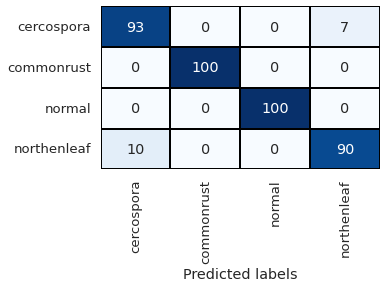

In [ ]:
# calculate confusion matrix & classification report model 1
import seaborn as sns
conf_m = confusion_matrix(y_val, y_val_hat1)

# plot confusion matrix as heatmap
plt.figure(figsize=(5,3))
sns.set(font_scale=1.2)
ax = sns.heatmap(conf_m, annot=True,xticklabels=['cercospora', 'commonrust','normal','northenleaf'], yticklabels=['cercospora', 'commonrust','normal','northenleaf'], cbar=False, cmap='Blues',linewidths=1, linecolor='black', fmt='.0f')
plt.yticks(rotation=0)
plt.xlabel('Predicted labels')

In [ ]:
from keras.models import model_from_json
import json

target_dir = '/content/drive/MyDrive/projek/model_80'

# simpan history model kedua
history_dict = HH2.history
json.dump(history_dict, open(target_dir + '/history_96_model2_T80_V20.json', 'w'))

# simpan model kedua dan weight-nya
modell2.save(target_dir + '/96_model2_T80_V20.h5')
modell2.save_weights(target_dir + '/weights_96_model2_T80_V20.h5')

## Model 3

In [ ]:
modelll= Sequential()

modelll.add(InputLayer(input_shape=[150,150,3]))

modelll.add(Conv2D(filters=8, kernel_size=3, strides=1,  padding='same', activation='relu'))
modelll.add(BatchNormalization())
modelll.add(MaxPool2D(pool_size=2, padding='same'))

modelll.add(Conv2D(filters=16, kernel_size=3, strides=1,  padding='same', activation='relu'))
modelll.add(BatchNormalization())
modelll.add(MaxPool2D(pool_size=2, padding='same'))

modelll.add(Conv2D(filters=16, kernel_size=3, strides=1,  padding='same', activation='relu'))
modelll.add(BatchNormalization())
modelll.add(MaxPool2D(pool_size=2, padding='same'))

modelll.add(Conv2D(filters=32, kernel_size=3, strides=1,  padding='same', activation='relu'))
modelll.add(BatchNormalization())
modelll.add(MaxPool2D(pool_size=2, padding='same'))

modelll.add(Conv2D(filters=64, kernel_size=3, strides=1,  padding='same', activation='relu'))
modelll.add(BatchNormalization())
modelll.add(MaxPool2D(pool_size=2, padding='same'))

modelll.add(Conv2D(filters=128, kernel_size=3, strides=1,  padding='same', activation='relu'))
modelll.add(BatchNormalization())
modelll.add(MaxPool2D(pool_size=2, padding='same'))

modelll.add(Conv2D(filters=256, kernel_size=3, strides=1,  padding='same', activation='relu'))
modelll.add(BatchNormalization())
modelll.add(MaxPool2D(pool_size=2, padding='same'))
modelll.add(Flatten())

modelll.add(Flatten())

  # Fully Connected Layer
modelll.add(Dense(128, activation='relu')) #hidden
modelll.add(Dropout(0.5))
modelll.add(Dense(256, activation='relu'))
modelll.add(Dropout(0.5))
modelll.add(Dense(256, activation='relu'))
modelll.add(Dropout(0.5))
modelll.add(Dense(4, activation='softmax'))  


In [ ]:
# Compile the model
modelll.compile(loss='categorical_crossentropy',
            optimizer=Adam(learning_rate=0.0002),
            metrics=['accuracy'])

In [ ]:
HHH = modelll.fit(train_gen.flow(x_train, y_train, batch_size=32), epochs=100, validation_data = (x_val, y_val))

Epoch 1/100
50/50 [==============================] - 9s 159ms/step - loss: 1.5284 - accuracy: 0.3769 - val_loss: 1.4106 - val_accuracy: 0.2500
Epoch 2/100
50/50 [==============================] - 8s 153ms/step - loss: 0.9345 - accuracy: 0.5888 - val_loss: 1.6925 - val_accuracy: 0.2500
Epoch 3/100
50/50 [==============================] - 8s 154ms/step - loss: 0.7549 - accuracy: 0.6712 - val_loss: 2.1362 - val_accuracy: 0.2500
Epoch 4/100
50/50 [==============================] - 8s 154ms/step - loss: 0.6099 - accuracy: 0.7362 - val_loss: 2.9606 - val_accuracy: 0.2500
Epoch 5/100
50/50 [==============================] - 8s 153ms/step - loss: 0.6016 - accuracy: 0.7281 - val_loss: 3.3450 - val_accuracy: 0.2500
Epoch 6/100
50/50 [==============================] - 8s 151ms/step - loss: 0.5113 - accuracy: 0.7644 - val_loss: 1.9602 - val_accuracy: 0.4050
Epoch 7/100
50/50 [==============================] - 8s 154ms/step - loss: 0.4988 - accuracy: 0.7663 - val_loss: 1.6658 - val_accuracy: 0.4775

In [ ]:
#model 1
y_val_hat1 = modelll.predict(x_val, batch_size=32)
y_val_hat1 = np.argmax(y_val_hat1, axis=1)
y_val = np.argmax(y_val, axis=1)

In [ ]:
clas_r = classification_report(y_val, y_val_hat1)
# print classification report
print('Classification report on test data')
print(clas_r)

Classification report on test data
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       100
           1       1.00      1.00      1.00       100
           2       1.00      0.99      0.99       100
           3       0.99      0.78      0.87       100

    accuracy                           0.94       400
   macro avg       0.95      0.94      0.94       400
weighted avg       0.95      0.94      0.94       400



Text(0.5, 0.5, 'Predicted labels')

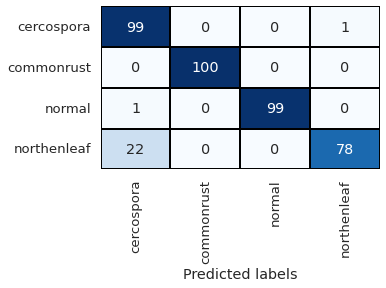

In [ ]:
# calculate confusion matrix & classification report model 1
import seaborn as sns
conf_m = confusion_matrix(y_val, y_val_hat1)

# plot confusion matrix as heatmap
plt.figure(figsize=(5,3))
sns.set(font_scale=1.2)
ax = sns.heatmap(conf_m, annot=True,xticklabels=['cercospora', 'commonrust','normal','northenleaf'], yticklabels=['cercospora', 'commonrust','normal','northenleaf'], cbar=False, cmap='Blues',linewidths=1, linecolor='black', fmt='.0f')
plt.yticks(rotation=0)
plt.xlabel('Predicted labels')

In [ ]:
from keras.models import model_from_json
import json

target_dir = '/content/drive/MyDrive/projek/model_80'

# simpan history model kedua
history_dict = HHH.history
json.dump(history_dict, open(target_dir + '/history_94_model3_T80_V20.json', 'w'))

# simpan model kedua dan weight-nya
modelll.save(target_dir + '/94_model3_T80_V20.h5')
modelll.save_weights(target_dir + '/weights_94_model3_T80_V20.h5')

# K FOLD Model 2

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
from tensorflow.keras.losses import categorical_crossentropy
#optimizer = SGD()
loss_function = categorical_crossentropy

In [ ]:
acc_per_fold = []
loss_per_fold = []

In [ ]:
X=np.array(x_train)

In [ ]:
Y=np.array(y_train)

In [ ]:
opt2=Adam(learning_rate=0.0002)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [ ]:
 # Define the K-fold Cross Validator
kfold = KFold(n_splits=10, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, val in kfold.split(X):

  model2 = Sequential()

  model2.add(InputLayer(input_shape=[150,150,3]))

  model2.add(Conv2D(filters=8, kernel_size=3, strides=1,  padding='same', activation='relu'))
  model2.add(BatchNormalization())
  model2.add(MaxPool2D(pool_size=2, padding='same'))


  model2.add(Conv2D(filters=16, kernel_size=3, strides=1,  padding='same', activation='relu'))
  model2.add(BatchNormalization())
  model2.add(MaxPool2D(pool_size=2, padding='same'))

  model2.add(Conv2D(filters=16, kernel_size=3, strides=1,  padding='same', activation='relu'))
  model2.add(BatchNormalization())
  model2.add(MaxPool2D(pool_size=2, padding='same'))

  model2.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
  model2.add(BatchNormalization())
  model2.add(MaxPool2D(pool_size=2, padding='same'))


  model2.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
  model2.add(BatchNormalization())
  model2.add(MaxPool2D(pool_size=2, padding='same'))


  model2.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
  model2.add(BatchNormalization())
  model2.add(MaxPool2D(pool_size=2, padding='same'))


  model2.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
  model2.add(BatchNormalization())
  model2.add(MaxPool2D(pool_size=2, padding='same'))
  model2.add(Flatten())

  # Fully Connected Layer
  model2.add(Dense(128, activation='relu')) #hidden
  model2.add(Dropout(0.5))
  model2.add(Dense(256, activation='relu'))
  model2.add(Dropout(0.5))
  model2.add(Dense(256, activation='relu'))
  model2.add(Dropout(0.5))
  model2.add(Dense(4, activation='softmax'))  

  # Compile the model
  model2.compile(loss=loss_function,
                optimizer=opt2,
                metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
 
  # Fit data to model
  history =  model2.fit(train_gen.flow(X[train], Y[train],
              batch_size=32),
              epochs=100,
              verbose=1,validation_data=(X[val], Y[val]))

  # Generate generalization metrics
  scores = model2.evaluate(X[val], Y[val], verbose=1)
  print(f'Score for fold {fold_no}: {model2.metrics_names[0]} of {scores[0]}; {model2.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # y_predict = model2.predict(X[val])
  # y=np.asarray(Y[val])
  # yval=np.argmax(y, axis=1)
  # y_predict_labels= np.argmax(y_predict,axis=1)

  # acc = accuracy_score(y_predict_labels, yval)
  # prec = precision_score(y_predict_labels, yval,average='weighted')
  # rec = recall_score(y_predict_labels, yval,average='weighted')
  # f1_score = f1_score(y_predict_labels, yval,average='weighted')

  # print("ACC = " ,acc)
  # print("PRECISION = ",prec)
  # print("RECALL = ",rec)
  # print("F1SCORE = ",f1_score)


  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/100
45/45 [==============================] - 22s 154ms/step - loss: 1.4263 - accuracy: 0.4174 - val_loss: 1.3995 - val_accuracy: 0.2313
Epoch 2/100
45/45 [==============================] - 7s 152ms/step - loss: 0.9473 - accuracy: 0.5771 - val_loss: 1.4448 - val_accuracy: 0.4437
Epoch 3/100
45/45 [==============================] - 7s 152ms/step - loss: 0.7350 - accuracy: 0.6819 - val_loss: 1.5401 - val_accuracy: 0.4187
Epoch 4/100
45/45 [==============================] - 7s 151ms/step - loss: 0.6562 - accuracy: 0.6979 - val_loss: 1.6030 - val_accuracy: 0.4625
Epoch 5/100
45/45 [==============================] - 7s 152ms/step - loss: 0.5902 - accuracy: 0.7229 - val_loss: 1.6711 - val_accuracy: 0.4625
Epoch 6/100
45/45 [==============================] - 7s 150ms/step - loss: 0.5623 - accuracy: 0.7465 - val_loss: 1.6660 - val_accuracy: 0.4375
Epoch 7/100
45/45 [=========================

In [ ]:
from keras.models import model_from_json
import json

target_dir = '/content/drive/MyDrive/projek/model'

# simpan history model kedua
history_dict = history.history
json.dump(history_dict, open(target_dir + '/history_model2_crossval_94.62_T80_V20.json', 'w'))

# simpan model kedua dan weight-nya
model2.save(target_dir + '/model2_crossval_94.62_T80_V20.h5')
model2.save_weights(target_dir + '/weights_model2_crossval_94.62_T80_V20.h5')